<a href="https://github.com/PhinanceScientist"><img src = "https://i.ibb.co/NLfc0SV/Deveaner.png" width = 100> </a>
<h1 align=center><font size = 5>México's presidential speech visual analysis with python  </font></h1>

## Introduction
In this project I will be using some web scraping tools for python to have a simple sight of the most common words used on two different speechs from the President of México found on the government official page for transcriptions.

After retrieving our data using <b>BeautifulSoup</b>, we will use the package <b>word_cloud</b> to convert our obteined text into a wordcloud image in order to focus on the words used on it.<br>  Also, I will be representing the top 10 most commont words on each one using <b>Matplotlib</b>.  The idea is to compare the difference between them within a year apart. 

Finally, I will analyse the results in a very superficial way as the main goal for this project is to demostrate the utility from the used libraries for python.

Feel free to comment or <a href="https://www.linkedin.com/in/novelo-luis/">contact me</a> for further improvement.

Please do notice that if you want to render this Jupyter notebook you can use this link https://nbviewer.jupyter.org/


### DATA
The data used for this project was scraped from the official government speechs transcription site https://lopezobrador.org.mx/ and then cleaned due to its sintaxis as the text use interview dialogue structure.<br>
The transcription of the speechs from the dates "4th of april 2020" and "4th of april 2019" were used.<br>
The technologies used here were IBM Watson Studio for the environment of the Jupyter notebooks in python and GitHub for repository.

# <p style =" text-align: center">METHODOLOGY<p> 


## Scraping data from Wikipedia using BeautifulSoup

In [22]:
#Import requests for web scraping
import pandas as pd
import requests as rq
import numpy as np
import collections

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib as mpl
import matplotlib.pyplot as plt

# import k-means from clustering stage
from PIL import Image 
from matplotlib import rcParams

print('Libraries installed')

Libraries installed


In [2]:
website_url= rq.get('https://lopezobrador.org.mx/2020/04/05/discurso-del-presidente-andres-manuel-lopez-obrador-en-su-informe-al-pueblo-de-mexico/').text #Bring the data from the target URL

### Now we shall use BeautifulSoup library

In [3]:
#Import BeautifulSoup for html structure information from our request
from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url,'lxml')

data = [element.text for element in soup.find_all("p")] #Retrieving text from "p" founds
data = str(data) #Convert to string
data


"['2020, Año de Leona Vicario, Benemérita Madre de la Patria', 'Amigas, amigos:\\xa0', 'Rindo este informe trimestral en medio de la incertidumbre por los estragos del coronavirus a la salud, a la economía y al bienestar de nuestro pueblo.', 'Antes que nada, expreso mi reconocimiento y solidaridad a todos los mexicanos que, con mucho sacrificio, se han sumado a las medidas de prevención recomendadas por la Secretaría de Salud. En particular, expreso mis condolencias a las familias de quienes han enfermado o han perdido sus seres queridos en esta contingencia.', 'Es por ello oportuno e indispensable expresarles, con absoluto apego a la verdad, lo que hemos venido haciendo y seguiremos llevando a cabo para enfrentar esta crisis transitoria y restablecer lo más pronto posible, la normalidad social, productiva y política de la vida pública del país.', 'Les anticipo que a pesar de los pesares saldremos adelante, porque son más nuestras fortalezas que las debilidades o flaquezas. No olvidemo

# What are the Word Clouds ?

A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.
For this task, we will be using the python library called 'word_cloud' developed by <b>Andreas Mueller</b>. <a hreef="https://github.com/amueller/word_cloud/">Here</a> you can find the repository and learn more about it.

In [4]:
!pip -q install wordcloud #Library for wordcloud

In [5]:
!pip -q install stop-words

In [6]:
from stop_words import get_stop_words #The words we want to ignore

stop_words_es = get_stop_words('es') #Spanish StopWords

In [7]:
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [8]:
stop_words = ["año", "mil", "millones", "pesos", "ciento", "El", "En"] + stop_words_es #Adding aditional StopWords
#initiate world cloud object
amlo_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stop_words
)

# generate the word cloud
amlo_wc.generate(data)

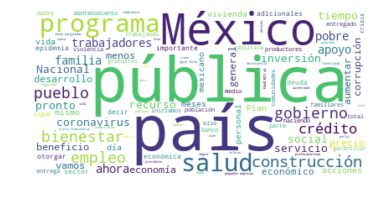

In [9]:
# display the word cloud
plt.imshow(amlo_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

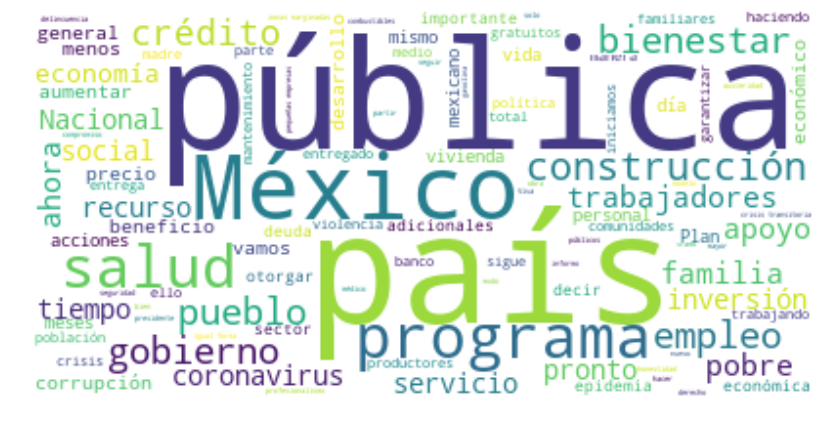

In [10]:

# re-generate the word cloud
amlo_wc.generate(data)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(amlo_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Retrieving the image for the mask

In [11]:
!wget --quiet https://raw.githubusercontent.com/PhinanceScientist/AMLO_Wordcloud/master/test.png #OutMaskImage

# save mask to mx_mask
mx_mask = np.array(Image.open('test.png'))
    
print('Image downloaded and saved!')

Image downloaded and saved!


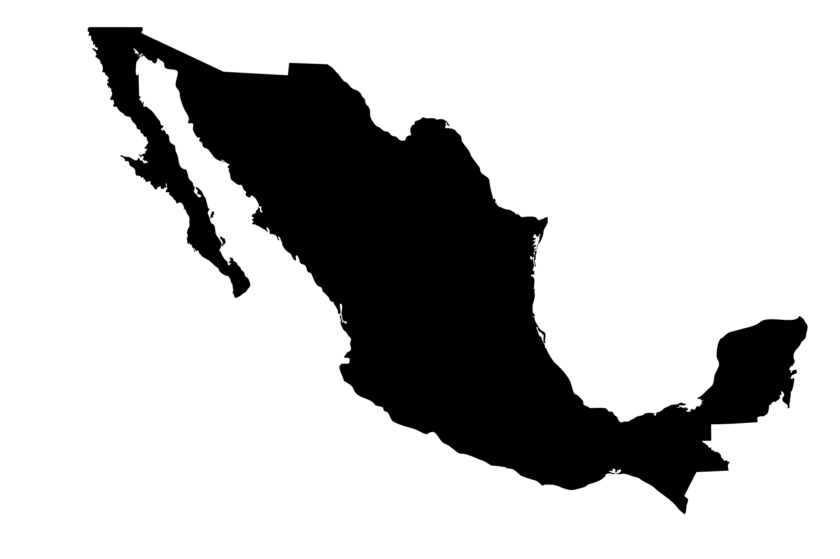

In [12]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(mx_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

***

Shaping the `word` cloud according to the mask is straightforward using `word_cloud` package. For simplicity, we will continue using the first 2000 words from the text.

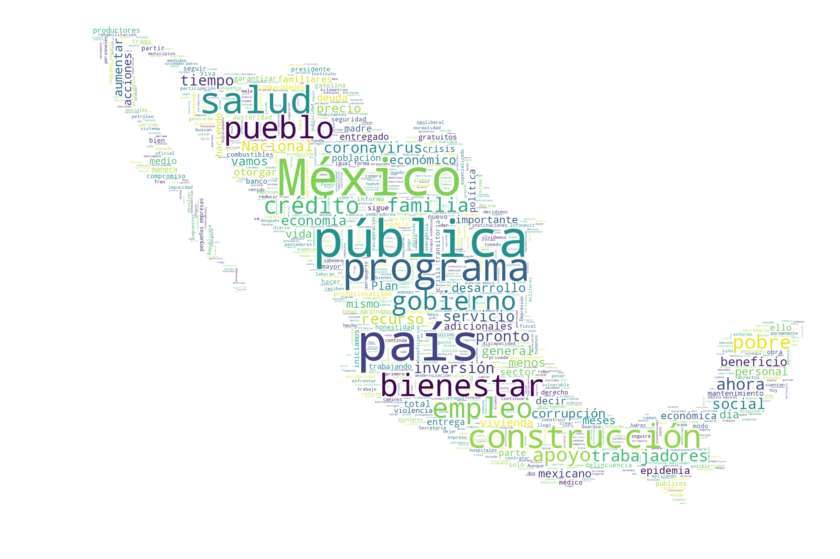

In [13]:
# instantiate a word cloud object
amlo_wc = WordCloud(background_color='white', max_words=2000, mask=mx_mask, stopwords=stop_words)

# generate the word cloud
amlo_wc.generate(data)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height


plt.imshow(amlo_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Prepare the data for ploting and count the words

In [14]:
filtered_words = [word for word in data.split() if word not in stop_words]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

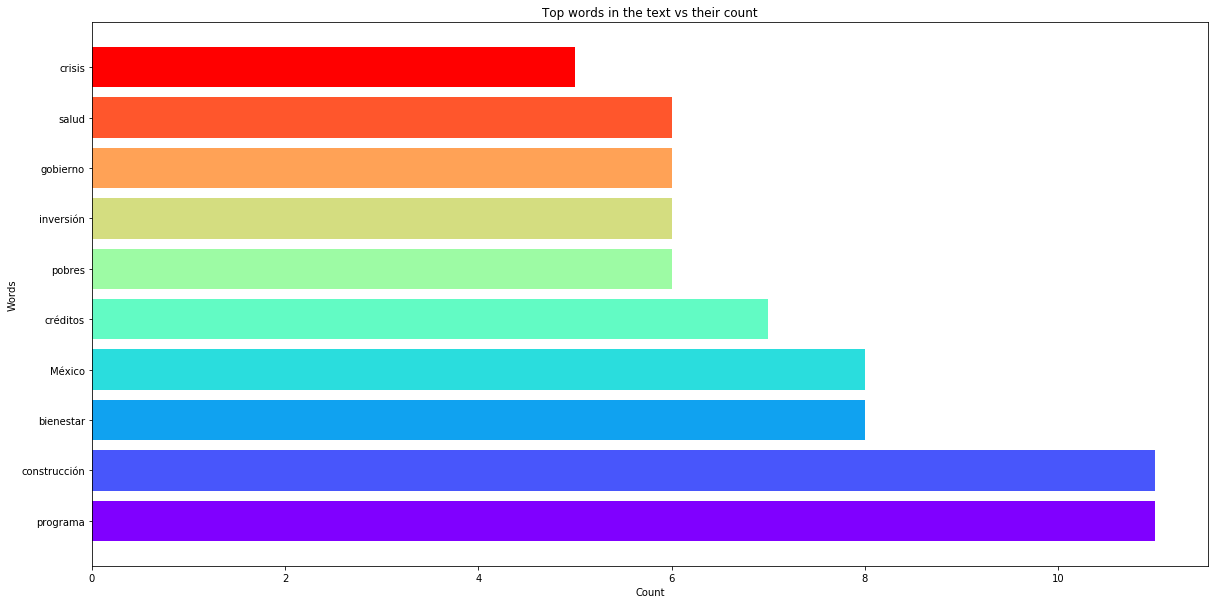

In [15]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the text vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

***

# Second Post

In [16]:
website_url2= rq.get('https://lopezobrador.org.mx/2019/04/04/version-estenografica-de-la-conferencia-de-prensa-matutina-del-presidente-andres-manuel-lopez-obrador-60/').text #Bring the data from the target URL

In [17]:
soup2 = BeautifulSoup(website_url2,'lxml')

data2 = [element.text for element in soup2.find_all("p")] #Retrieving text from "p" founds
data2 = str(data2) #Convert to string

In [18]:
stop_words2 = ["año", "mil", "millones", "pesos", "ciento", "El", "En","PRESIDENTE", "ANDRÉS", "MANUEL" ,"LÓPEZ", "OBRADOR", "INTERLOCUTOR", "OBRADOR:", "'PRESIDENTE", "VAMOS", "Y","'Y", "'PREGUNTA:", "ser", "van", "va", "Es","'INTERLOCUTOR:", "'INTERLOCUTORA:","pues", "dos","'Entonces,", "cómo", "ahí", "ENTONCES", "PREGUNTA", "INTERLOCUTORA", "años"] + stop_words_es #Adding aditional StopWords
amlo_wc2 = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stop_words2
)

# generate the word cloud
amlo_wc2.generate(data2)

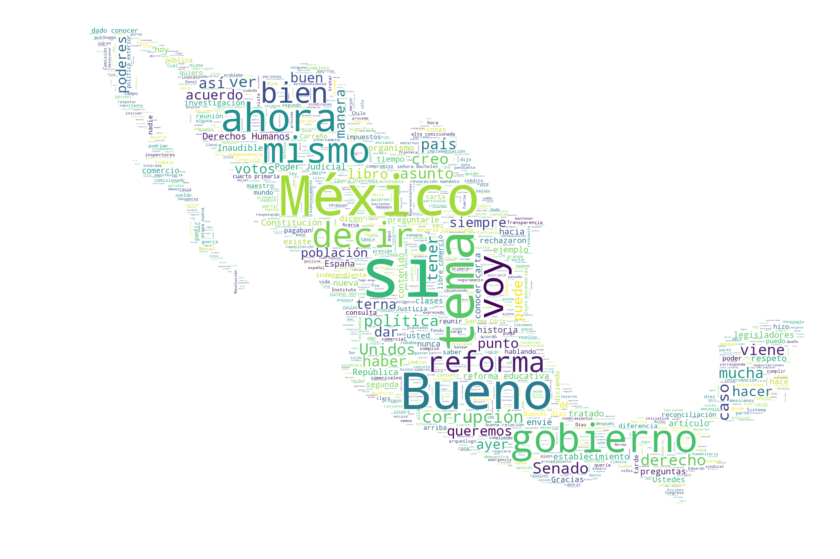

In [19]:
# instantiate a word cloud object
amlo_wc2 = WordCloud(background_color='white', max_words=2000, mask=mx_mask, stopwords=stop_words2)

# generate the word cloud
amlo_wc2.generate(data2)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height


plt.imshow(amlo_wc2, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
filtered_words2 = [word for word in data2.split() if word not in stop_words2]
counted_words2 = collections.Counter(filtered_words2)

words = []
counts = []
for letter, count in counted_words2.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

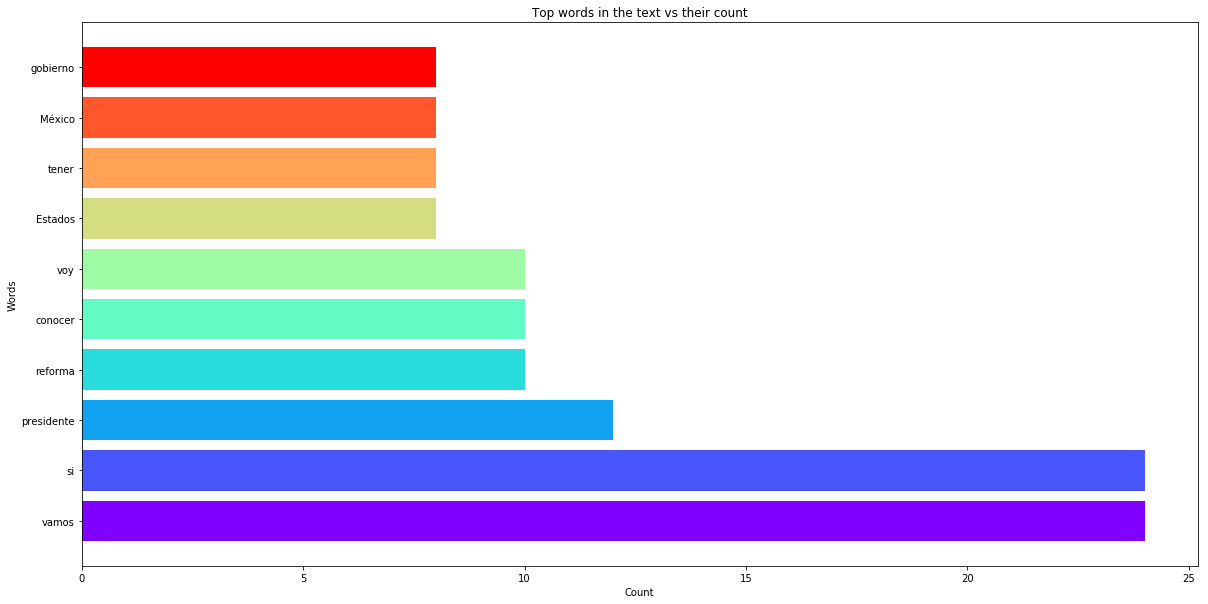

In [21]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the text vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)


***

## Results 

<b>4th april 2020, top 10 words:</b>
<li> programa</li>
<li> construcción</li>
<li> bienestar</li>
<li> México</li>
<li> créditos</li>
<li> pobres</li>
<li> inversión</li>
<li> gobierno</li>
<li> salud</li>
<li> crisis</li>

<b>4th april 2019, top 10 words:</b>
<li> vamos</li>
<li> si</li>
<li> presidente</li>
<li> reforma</li>
<li> conocer</li>
<li> Estados</li>
<li> tener</li>
<li> México</li>
<li> gobierno</li>
<li> ahora</li>

## Conclusion

We can observe that in the 2020's speech there are words used by the government to talk about its support programs and important sectors such as construction. It also mentions investment and issues of special relevance such as the health crisis, credits and jobs for poor people.
'
In the image from 2019's speech we can notice different words. Here the words like 'reform','well'and 'good' stand out. It <b>seems</b> that the words used during 2019 contained a more positive meaning compared to 2020.

In conclusion, we can use these tools to get an idea of what the President's speech represents and how it changed from year to year in a way that it is  easy to visually identify the important points the government wants to highlight.

Although we did not analyze deeply the content of the transcripts in this work, we can identify the points that the President of Mexico wants to emphasize with the words used during his speech and the message he wishes to deliver.

## References

https://github.com/amueller/word_cloud/ <br>
https://lopezobrador.org.mx/ <br>
https://lopezobrador.org.mx/2020/04/05/discurso-del-presidente-andres-manuel-lopez-obrador-en-su-informe-al-pueblo-de-mexico/ <br>
https://lopezobrador.org.mx/2019/04/04/version-estenografica-de-la-conferencia-de-prensa-matutina-del-presidente-andres-manuel-lopez-obrador-60/ <br>
https://prowritingaid.com/art/425/What-the-Heck-is-a-Word-Cloud-and-Why-Would-I-Use-One.aspx <br>
https://matplotlib.org/ <br>

This notebook was made by <a href="https://www.linkedin.com/in/novelo-luis/">Luis Novelo</a>